# Proyecto Final - Modelación y Simulación

### Sistema de Colas en un Supermercado

Manuel Rodas / Jose Santisteban / Sebastian Solorzano 

### Importación de Librerías

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque

### Clase para la Simulacion del Supermercado

In [138]:
class SimulacionSupermercado:
    def __init__(self, lambda_rate, mu_rate, num_cajas, simulation_time):
        self.lambda_rate = lambda_rate / 60
        self.mu_rate = mu_rate / 60
        self.num_cajas = num_cajas
        self.simulation_time = simulation_time
        
    def simular(self):
        # Generar llegadas de clientes
        num_clientes_esperados = int(self.lambda_rate * self.simulation_time * 1.5)
        llegadas = np.sort(np.random.exponential(1/self.lambda_rate, num_clientes_esperados))
        llegadas = llegadas[llegadas < self.simulation_time]
        
        # Inicializar variables
        tiempos_cola = []
        tiempos_sistema = []
        longitudes_cola = []
        tiempos_servicio = []
        utilizacion_cajas = []
        cajas_ocupadas = np.zeros(self.num_cajas)
        cola = deque()
        
        # Procesar cada llegada
        for tiempo_llegada in llegadas:
            # Liberar cajas que ya terminaron
            cajas_disponibles = cajas_ocupadas <= tiempo_llegada
            cajas_ocupadas[cajas_disponibles] = tiempo_llegada
            
            # Calcular utilización actual
            utilizacion_cajas.append(np.mean(cajas_ocupadas > tiempo_llegada))
            
            # Atender clientes en cola si hay cajas disponibles
            while cola and np.any(cajas_disponibles):
                cliente_cola = cola.popleft()
                caja = np.argmin(cajas_ocupadas)
                tiempo_espera = tiempo_llegada - cliente_cola
                tiempo_servicio = min(max(np.random.exponential(1/self.mu_rate), 1), 5)
                
                tiempos_cola.append(tiempo_espera)
                tiempos_sistema.append(tiempo_espera + tiempo_servicio)
                tiempos_servicio.append(tiempo_servicio)
                cajas_ocupadas[caja] = tiempo_llegada + tiempo_servicio
                cajas_disponibles = cajas_ocupadas <= tiempo_llegada
            
            # Atender cliente actual si hay caja disponible
            if np.any(cajas_ocupadas <= tiempo_llegada):
                caja = np.argmin(cajas_ocupadas)
                tiempo_servicio = min(max(np.random.exponential(1/self.mu_rate), 1), 5)
                tiempos_cola.append(0)
                tiempos_sistema.append(tiempo_servicio)
                tiempos_servicio.append(tiempo_servicio)
                cajas_ocupadas[caja] = tiempo_llegada + tiempo_servicio

            else:
                cola.append(tiempo_llegada)
            
            longitudes_cola.append(len(cola))
        
        return (np.array(tiempos_cola), np.array(tiempos_sistema), 
                np.array(longitudes_cola), np.array(tiempos_servicio),
                np.array(utilizacion_cajas))

    def mostrar_resultados(self, tiempos_cola, tiempos_sistema, longitudes_cola, tiempos_servicio, utilizacion_cajas):
        # Calcular estadísticas
        print("\nEstadísticas de la simulación:")
        print(f"Tiempo promedio en cola: {np.mean(tiempos_cola):.2f} minutos")
        print(f"Tiempo promedio de servicio: {np.mean(tiempos_servicio):.2f} minutos")
        print(f"Tiempo promedio en sistema: {np.mean(tiempos_sistema):.2f} minutos")
        print(f"Longitud promedio de cola: {np.mean(longitudes_cola):.2f}")
        print(f"Máxima longitud de cola: {np.max(longitudes_cola)}")
        print(f"Utilización promedio de cajas: {np.mean(utilizacion_cajas):.2%}")
        
        # Visualizaciones
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Tiempos de espera
        sns.histplot(data=tiempos_cola, bins=30, kde=True, ax=axes[0,0])
        axes[0,0].set_title('Distribución de tiempos de espera en cola')
        axes[0,0].set_xlabel('Minutos')
        
        # Tiempos en sistema
        sns.histplot(data=tiempos_sistema, bins=30, kde=True, ax=axes[0,1])
        axes[0,1].set_title('Distribución de tiempos en sistema')
        axes[0,1].set_xlabel('Minutos')
        
        # Evolución de la cola
        axes[1,0].plot(longitudes_cola)
        axes[1,0].set_title('Evolución de la longitud de la cola')
        axes[1,0].set_xlabel('Número de cliente')
        axes[1,0].set_ylabel('Clientes en cola')
        
        # Utilización de cajas
        axes[1,1].plot(utilizacion_cajas)
        axes[1,1].set_title('Utilización de cajas a lo largo del tiempo')
        axes[1,1].set_xlabel('Número de cliente')
        axes[1,1].set_ylabel('Proporción de cajas ocupadas')
        
        plt.tight_layout()
        plt.show()

### Parámetros de Simulación

In [139]:
# Parámetros de la simulación
lambda_rate = 20 # Tasa de llegada de clientes por hora
mu_rate = 20 # Tasa de servicio de cajas por hora
num_cajas = 4 # Número de cajas en el supermercado
tiempo_sim = 60 # Tiempo de simulación en minutos
np.random.seed(42) # Semilla para reproducibilidad

### Ejecución de la Simulación

In [140]:
sim = SimulacionSupermercado(lambda_rate, mu_rate, num_cajas, tiempo_sim)
resultados = sim.simular()

### Análisis y Visualización de Resultados


Estadísticas de la simulación:
Tiempo promedio en cola: 4.13 minutos
Tiempo promedio de servicio: 2.58 minutos
Tiempo promedio en sistema: 6.71 minutos
Longitud promedio de cola: 9.83
Máxima longitud de cola: 19
Utilización promedio de cajas: 83.33%


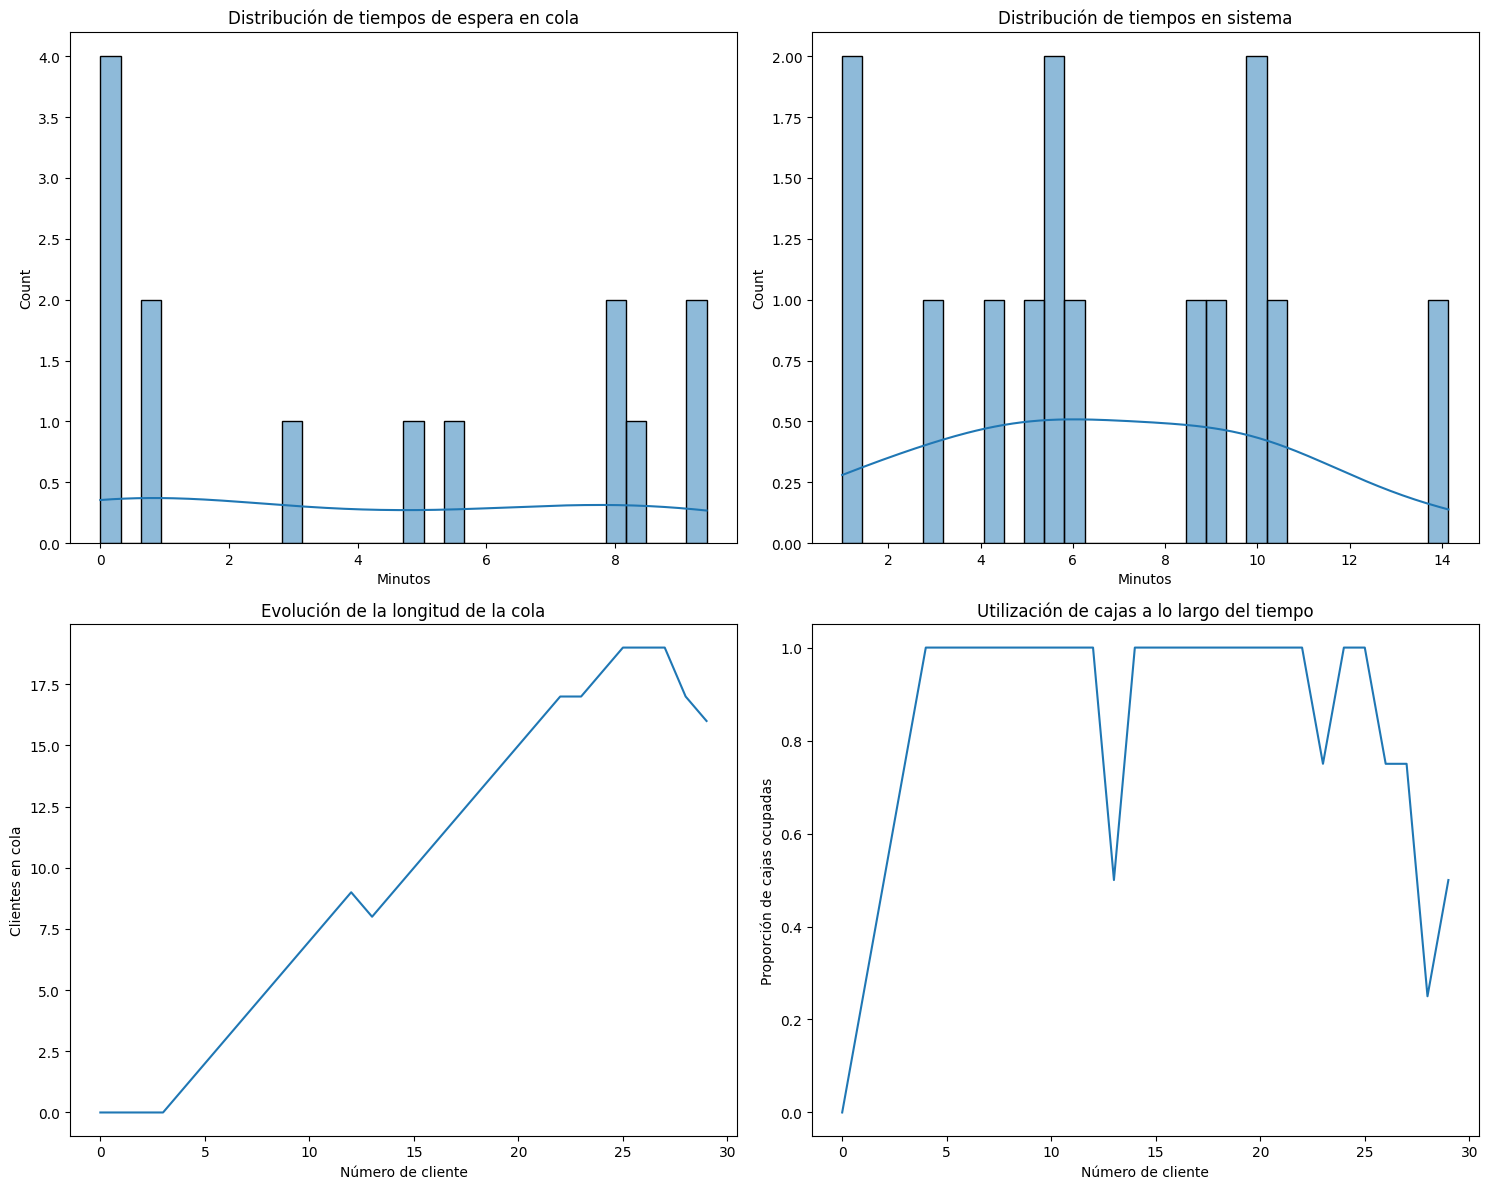

In [141]:
sim.mostrar_resultados(*resultados)